In [2]:
import csv
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
def read_data():
    guard = pd.read_csv('서울특별시 경비인원 정보.csv', encoding='utf-8')
    rate = pd.read_csv('secure_7.csv', encoding='utf-8')

    return guard, rate

In [4]:
def make_dict(rate):
    # 각 지구대, 피출소 별 관할 구역
    boundary_dict = dict()
    for idx in range(len(rate)):
        boundary_dict[rate.loc[idx]['지구대']] = rate.loc[idx]['관할구역'].split(', ')
    # print(boundary_dict)
   
    # 각 지구대, 파출소 별 치안 등급 (전체, 살인, 강도, 절도, 폭력, 성폭력)
    rate_dict = dict()
    col_list = list(rate)[:6] # 컬럼명
    for idx in range(len(rate)):
        rate_dict[rate.loc[idx]['지구대']] = dict()
        for c in col_list:
            rate_dict[rate.loc[idx]['지구대']][c] = rate.loc[idx][c]
    # print(rate_dict)

    # 각 지구대, 파출소 관할구역 별 경비인원 수 초기화
    guard_num = dict()
    for idx in range(len(rate)):
        guard_num[rate.loc[idx]['지구대']] = 0

    return boundary_dict, rate_dict, guard_num

In [5]:
guard, rate = read_data()

In [6]:
boundary_dict, rate_dict, guard_num = make_dict(rate)

In [7]:
boundary_dict_key = boundary_dict.keys()

In [8]:
for index, row in guard.iterrows():
    a = row['법정동주소']
    b = row['도로명주소']
    c = row['주소(읍면동)']
    x = a.split()[2]
    y = b.split()[2]
    for keys in boundary_dict_key:
        if x in boundary_dict[keys]:
            guard_num[keys] += row['경비인원']
            continue
        elif y in boundary_dict[keys]:
            guard_num[keys] += row['경비인원']
            continue
        elif c in boundary_dict[keys]:
            guard_num[keys] += row['경비인원']
            continue


In [9]:
guard_df = pd.DataFrame(
    guard_num.items(), columns=['지구대', '경비인원'])

In [10]:
guard_df

,지구대,경비인원
0,교남,110
1,사직,24
2,옥인,0
3,청운,0
4,통의,0
...,...,...
82,구일,120
83,구로3,102
84,고척,92
85,개봉,238


In [11]:
guard_rate = pd.merge(guard_df, rate, on='지구대')
guard_rate

,지구대,경비인원,전체,살인,강도,절도,폭력,성폭력,구,주소,위도,경도,관할구역
0,교남,110,4,3,1,4,4,3,종로구,서울 종로구 행촌동 송월길 152,37.571795,126.962182,"홍파동, 교남동, 교북동, 평동, 송월동, 행촌동, 무악동"
1,사직,24,4,2,3,3,3,4,종로구,서울 종로구 사직로9길 5,37.575950,126.968135,"체부동, 사직동, 사직로5길, 사직로7길, 사직로9길, 사직로49-4, 사직로49-..."
2,옥인,0,2,1,1,2,2,2,종로구,서울 종로구 자하문로17길 24,37.581456,126.969412,"옥인동, 통인동, 누상동, 옥인3길, 필운대로1길, 필운대로5나길, 누하동"
3,청운,0,1,1,2,1,1,1,종로구,서울 종로구 자하문로 92-1,37.584123,126.970577,"청운동, 신교동, 세종로동, 청와대로1, 궁정동, 창의문로12, 창의문로21, 자하..."
4,통의,0,2,1,1,2,2,1,종로구,서울 종로구 효자로 9,37.576754,126.973976,"통의동, 창성동, 효자동, 적선동, 효자로3길, 사직로135, 사직로137, 사직로..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,구일,120,5,4,5,5,5,3,구로구,서울 구로구 도림로 63,37.489246,126.890694,"구로1동, 구로4동"
83,구로3,102,3,2,1,4,4,5,구로구,서울 구로구 디지털로31길 86,37.486661,126.891356,"도림로, 도림로20길, 도림로22길, 도림로24길, 도림로26길, 도림로28길, 도..."
84,고척,92,2,3,1,2,2,2,구로구,서울 구로구 중앙로15길 30,37.506543,126.858229,"고척1동, 고척2동,"
85,개봉,238,2,2,2,2,2,3,구로구,서울 구로구 개봉로18길 5,37.491708,126.856431,"개봉1동, 경인로, 고척로, 개봉2동, 개봉동"


In [12]:
guard_rate = guard_rate[['경비인원', '전체', '살인', '강도','절도', '폭력', '성폭력']]
guard_rate

,경비인원,전체,살인,강도,절도,폭력,성폭력
0,110,4,3,1,4,4,3
1,24,4,2,3,3,3,4
2,0,2,1,1,2,2,2
3,0,1,1,2,1,1,1
4,0,2,1,1,2,2,1
...,...,...,...,...,...,...,...
82,120,5,4,5,5,5,3
83,102,3,2,1,4,4,5
84,92,2,3,1,2,2,2
85,238,2,2,2,2,2,3


In [13]:
guard_rate = guard_rate[guard_rate['경비인원']>0][['경비인원', '전체', '살인', '강도', '절도', '폭력', '성폭력']]

In [14]:
guard_rate

,경비인원,전체,살인,강도,절도,폭력,성폭력
0,110,4,3,1,4,4,3
1,24,4,2,3,3,3,4
5,28,3,3,1,3,3,3
9,6,5,4,4,5,5,5
10,10,5,3,4,2,3,5
...,...,...,...,...,...,...,...
81,166,2,1,1,2,2,2
82,120,5,4,5,5,5,3
83,102,3,2,1,4,4,5
84,92,2,3,1,2,2,2


In [15]:
corr = guard_rate.corr(method='pearson')
corr

,경비인원,전체,살인,강도,절도,폭력,성폭력
경비인원,1.000000,-0.006245,0.006083,0.037261,-0.098767,-0.150348,0.255026
전체,-0.006245,1.000000,0.540099,0.633773,0.514907,0.418288,0.717779
살인,0.006083,0.540099,1.000000,0.515808,0.373978,0.475963,0.396274
강도,0.037261,0.633773,0.515808,1.000000,0.392745,0.259368,0.437031
절도,-0.098767,0.514907,0.373978,0.392745,1.000000,0.652364,0.324915
폭력,-0.150348,0.418288,0.475963,0.259368,0.652364,1.000000,0.305324
성폭력,0.255026,0.717779,0.396274,0.437031,0.324915,0.305324,1.000000


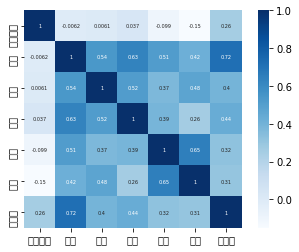

In [17]:
df_heatmap = sns.heatmap(corr, annot = True, annot_kws={'size' : 5}, square = True, cmap = 'Blues')

In [18]:
def read_data():
    guard = pd.read_csv('서울특별시 경비인원 정보.csv', encoding='utf-8')
    rate = pd.read_csv('low_secure.csv', encoding='utf-8')

    return guard, rate

In [19]:
guard, rate = read_data()

In [20]:
boundary_dict, rate_dict, guard_num = make_dict(rate)

In [21]:
boundary_dict_key = boundary_dict.keys()

In [22]:
for index, row in guard.iterrows():
    a = row['법정동주소']
    b = row['도로명주소']
    c = row['주소(읍면동)']
    x = a.split()[2]
    y = b.split()[2]
    for keys in boundary_dict_key:
        if x in boundary_dict[keys]:
            guard_num[keys] += row['경비인원']
            continue
        elif y in boundary_dict[keys]:
            guard_num[keys] += row['경비인원']
            continue
        elif c in boundary_dict[keys]:
            guard_num[keys] += row['경비인원']
            continue


In [23]:
guard_df = pd.DataFrame(
    guard_num.items(), columns=['지구대', '경비인원'])

In [24]:
guard_rate = pd.merge(guard_df, rate, on='지구대')
guard_rate

,지구대,경비인원,전체,살인,강도,절도,폭력,성폭력,구,주소,위도,경도,관할구역
0,화곡,216,5,4,5,4,3,5,강서구,서울특별시 강서구 화곡6동 980-15,37.551669,126.849931,"화곡6동, 화곡동, 화곡본동"
1,곰달래,216,3,3,2,4,4,4,강서구,서울특별시 강서구 화곡4동 776-4,37.532921,126.863110,"화곡2동, 화곡4동, 화곡8동, 화곡동, 화곡본동"
2,공항,234,4,5,4,3,3,4,강서구,서울특별시 강서구 방화2동 620-111,37.562380,126.808292,"공항동, 괴해동, 오곡동, 오쇠동, 방화1동, 방화2동, 개화동, 방화동"
3,까치산,216,4,3,3,5,4,5,강서구,서울특별시 강서구 화곡동 901-15,37.529321,126.845806,"화곡1동, 화곡동"
4,가양,530,4,4,3,4,3,5,강서구,서울특별시 강서구 등촌3동 706-1,37.559256,126.850118,"가양1동, 가양2동, 가양3동, 등촌3동, 가양동, 등촌동"
5,발산,6,3,4,1,3,2,3,강서구,서울특별시 강서구 발산1동 수명로2길 46,37.549339,126.826065,"발산1동, 발산동, 우장산동"
6,염창,362,3,1,2,3,2,4,강서구,서울특별시 강서구 염창동 272-28,37.551902,126.867380,"염창동, 등촌1동, 등촌동"
7,화곡3,216,2,3,1,4,2,2,강서구,서울특별시 강서구 화곡6동 980-15,37.544632,126.835207,"화곡3동, 화곡동"
8,등촌2,209,2,2,1,4,3,2,강서구,서울특별시 강서구 등촌동 등촌로 167,37.544870,126.861892,"등촌2동, 등촌동"
9,방환3,230,2,1,1,2,2,2,강서구,서울특별시 강서구 방화3동 822,37.579780,126.814683,"방화3동, 방화동"


In [25]:
guard_rate = guard_rate[['경비인원', '전체', '살인', '강도','절도', '폭력', '성폭력']]
guard_rate

,경비인원,전체,살인,강도,절도,폭력,성폭력
0,216,5,4,5,4,3,5
1,216,3,3,2,4,4,4
2,234,4,5,4,3,3,4
3,216,4,3,3,5,4,5
4,530,4,4,3,4,3,5
5,6,3,4,1,3,2,3
6,362,3,1,2,3,2,4
7,216,2,3,1,4,2,2
8,209,2,2,1,4,3,2
9,230,2,1,1,2,2,2


In [26]:
guard_rate = guard_rate[guard_rate['경비인원']>0][['경비인원', '전체', '살인', '강도', '절도', '폭력', '성폭력']]

In [27]:
corr = guard_rate.corr(method='pearson')
corr

,경비인원,전체,살인,강도,절도,폭력,성폭력
경비인원,1.000000,0.079441,0.043453,0.114627,0.141489,0.418814,0.063877
전체,0.079441,1.000000,0.393143,0.439070,0.349287,0.410331,0.900016
살인,0.043453,0.393143,1.000000,0.064407,0.301059,0.386617,0.307692
강도,0.114627,0.439070,0.064407,1.000000,0.147403,0.075783,0.382197
절도,0.141489,0.349287,0.301059,0.147403,1.000000,0.549350,0.339739
폭력,0.418814,0.410331,0.386617,0.075783,0.549350,1.000000,0.396615
성폭력,0.063877,0.900016,0.307692,0.382197,0.339739,0.396615,1.000000


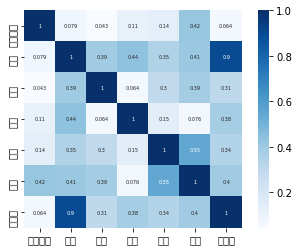

In [28]:
df_heatmap = sns.heatmap(corr, annot = True, annot_kws={'size' : 5}, square = True, cmap = 'Blues')